In [1]:
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn import decomposition, ensemble
from sklearn.model_selection import train_test_split
import pandas, xgboost, numpy, textblob, string
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier
from matplotlib import pyplot
from sklearn.preprocessing import LabelBinarizer
import matplotlib.pyplot as plt
from tqdm._tqdm_notebook import tqdm_notebook
import pandas as pd
tqdm_notebook.pandas()
from sklearn.decomposition import TruncatedSVD
import nltk
import string
import numpy as np
import pandas as pd
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
import re
from sklearn.manifold import TSNE
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
from sklearn.preprocessing import LabelBinarizer
import sklearn.datasets as skds
import re
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer

wordnet_lemmatizer = WordNetLemmatizer()
stemmer = SnowballStemmer("english")
stopWords = set(stopwords.words('english'))

C:\Users\Sabir Ismail\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
df = pd.read_csv('./Data/ready_for_classification.csv')

C:\Users\Sabir Ismail\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (4,5,6,7,8,9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
print(len(df))
# df = df[df.Type == 'original']
# print(len(df))

59465


In [4]:
df.head()

,ID,Title,Post,Type,Tag1,Help,Problem,Answer,Clarification,Elaboration,...,VBN,VBP,VBZ,JJ,JJR,JJS,RB,RBR,RBS,WRB
0,1,2017.2,2017 2 hello see announcement 2017 2 out machi...,original,tagged,Help,undefined,undefined,undefined,undefined,...,0,1,0,2,0,0,0,0,0,0
1,2,2017.2,hi dave yes update available got it rosemarie,following,tagged,undefined,undefined,Answer,undefined,undefined,...,0,0,0,2,0,0,0,0,0,0
2,3,2017.2,change suspect rc1 canadate available day,following,tagged,undefined,undefined,Answer,undefined,Elaboration,...,0,0,0,1,0,0,0,0,0,0
3,4,2017.2,hi also updated latest nvda version help menu ...,following,tagged,undefined,undefined,undefined,undefined,undefined,...,0,1,0,8,0,2,4,0,0,0
4,5,2017.2,sorry folk mick jamie working later last night...,following,tagged,undefined,undefined,Answer,undefined,Elaboration,...,0,0,0,7,0,0,3,0,0,0


In [5]:
CANDIDATE = "Help"

In [6]:
def assign_tag(row):
    h, p, a, c, e, j = row[5], row[6], row[7], row[8], row[9], row[10]
    if CANDIDATE == 'Help':
        if h == 'Help' or p == 'Problem':
            return 'Help'
        else:
            return 'None'

In [7]:
df['Tag'] = df.progress_apply(assign_tag, axis=1)

HBox(children=(IntProgress(value=0, max=59465), HTML(value='')))

In [8]:
df['Last_Tag'] = df['Last_Tag'].fillna("NA")
df['Post'] = df['Post'].fillna("NA")

In [9]:
#df_filtered['Author'] = le.fit_transform(df_filtered.Author.values)
from sklearn import preprocessing

leTag = preprocessing.LabelEncoder()
df['Tag'] = leTag.fit_transform(df['Tag'].values)

leType = preprocessing.LabelEncoder()
df['Type'] = leType.fit_transform(df['Type'].values)

leLastTag = preprocessing.LabelEncoder()
df['Last_Tag'] = leLastTag.fit_transform(df['Last_Tag'].values)

In [10]:
features= [c for c in df.columns.values if c  not in ['Tag2', \
                                                      'date_feature', 'commas','stemmed', \
                                                       'Help','Problem','Answer','Clarification','Elaboration','Junk']]
                                                               #'is_help','is_problem','is_announcement']]
                                                               #'length','words','words_not_stopword','avg_word_length']]

In [11]:
features

['ID',
 'Title',
 'Post',
 'Type',
 'Tag1',
 'Original_post',
 'count_post',
 'Position',
 'Last_Tag',
 'count_help',
 'count_wh',
 'count_other',
 'length',
 'words_not_stopword',
 'NN',
 'NNS',
 'NNP',
 'NNPS',
 'PRP',
 'PRP$',
 'WP',
 'WP$',
 'VB',
 'VBD',
 'VBG',
 'VBN',
 'VBP',
 'VBZ',
 'JJ',
 'JJR',
 'JJS',
 'RB',
 'RBR',
 'RBS',
 'WRB',
 'Tag']

In [12]:
df = df[features]

In [13]:
df.columns

Index(['ID', 'Title', 'Post', 'Type', 'Tag1', 'Original_post', 'count_post',
       'Position', 'Last_Tag', 'count_help', 'count_wh', 'count_other',
       'length', 'words_not_stopword', 'NN', 'NNS', 'NNP', 'NNPS', 'PRP',
       'PRP$', 'WP', 'WP$', 'VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ', 'JJ',
       'JJR', 'JJS', 'RB', 'RBR', 'RBS', 'WRB', 'Tag'],
      dtype='object')

In [14]:
df.head()

,ID,Title,Post,Type,Tag1,Original_post,count_post,Position,Last_Tag,count_help,...,VBP,VBZ,JJ,JJR,JJS,RB,RBR,RBS,WRB,Tag
0,1,2017.2,2017 2 hello see announcement 2017 2 out machi...,1,tagged,"2017.2 "" hello, i didn't see any announceme...",7,1,6,0,...,1,0,2,0,0,0,0,0,0,0
1,2,2017.2,hi dave yes update available got it rosemarie,0,tagged,""" hi, dave, yes, the update is available. i...",7,2,3,0,...,0,0,2,0,0,0,0,0,0,1
2,3,2017.2,change suspect rc1 canadate available day,0,tagged,it is out no change i suspect from the rc1 can...,7,4,0,0,...,0,0,1,0,0,0,0,0,0,1
3,4,2017.2,hi also updated latest nvda version help menu ...,0,tagged,""" hi! i also updated to the latest nvda-ver...",7,5,0,1,...,1,0,8,0,2,4,0,0,0,1
4,5,2017.2,sorry folk mick jamie working later last night...,0,tagged,""" sorry folks, mick and jamie were working la...",7,7,4,0,...,0,0,7,0,0,3,0,0,0,1


In [15]:
from sklearn.base import BaseEstimator, TransformerMixin

class TextSelector(BaseEstimator, TransformerMixin):
    """
    Transformer to select a single column from the data frame to perform additional transformations on
    Use on text columns in the data
    """
    def __init__(self, key):
        self.key = key

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X[self.key]

In [16]:
class NumberSelector(BaseEstimator, TransformerMixin):
    """
    Transformer to select a single column from the data frame to perform additional transformations on
    Use on numeric columns in the data
    """
    def __init__(self, key):
        self.key = key

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X[[self.key]]

In [17]:
class ListSelector(BaseEstimator, TransformerMixin):
    """
    Transformer to select a single column from the data frame to perform additional transformations on
    Use on numeric columns in the data
    """
    def __init__(self, key):
        self.key = key

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X[self.key].values

In [18]:
class BinarySelector(BaseEstimator, TransformerMixin):
    """
    Transformer to select a single column from the data frame to perform additional transformations on
    Use on numeric columns in the data
    """
    def __init__(self, key):
        self.key = key

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X[[self.key]]

In [19]:
class DateSelector(BaseEstimator, TransformerMixin):
    """
    Transformer to select a single column from the data frame to perform additional transformations on
    Use on numeric columns in the data
    """
    def __init__(self, key):
        self.key = key

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X[[self.key]]

In [20]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

Post = Pipeline([
                ('selector', TextSelector(key='Post')),
                ('cnt', CountVectorizer()), #stop_words='english' 
                #('tf_idf', TfidfVectorizer(smooth_idf=False, sublinear_tf=False, norm=None, analyzer='word')),
            ])

Post.fit_transform(df)

<59465x47107 sparse matrix of type '<class 'numpy.int64'>'
	with 2379792 stored elements in Compressed Sparse Row format>

In [21]:
# from sklearn.pipeline import Pipeline
# from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

# Post_tf_idf = Pipeline([
#                 ('selector', TextSelector(key='Post')),
#                 #('cnt', CountVectorizer()), #stop_words='english' 
#                 ('tf_idf', TfidfVectorizer(smooth_idf=False, sublinear_tf=False, norm=None, analyzer='word')),
#             ])

# Post_tf_idf.fit_transform(X_data)

In [22]:
count_other =  Pipeline([
                ('selector', NumberSelector(key='count_other')),
            ])
count_help =  Pipeline([
                ('selector', NumberSelector(key='count_help')),
            ])
count_wh =  Pipeline([
                ('selector', NumberSelector(key='count_wh')),
            ])

count_other.fit_transform(df)
count_help.fit_transform(df)
count_wh.fit_transform(df)
print('Done')

Done


In [23]:
from sklearn.preprocessing import StandardScaler

position =  Pipeline([
                ('selector', NumberSelector(key='Position')),
                ('standard', StandardScaler())
            ])

last_tag =  Pipeline([
                ('selector', NumberSelector(key='Last_Tag')),
            ])

typee =  Pipeline([
                ('selector', NumberSelector(key='Type')),
            ])

position.fit_transform(df)
last_tag.fit_transform(df)
typee.fit_transform(df)
print('Done')

Done


In [24]:
length =  Pipeline([
                ('selector', NumberSelector(key='length')),
                ('standard', StandardScaler())
            ])
length.fit_transform(df)
print('Done')

Done


In [25]:
RB_count =  Pipeline([
                ('selector', NumberSelector(key='RB')),
                ('standard', StandardScaler())
            ])

RBR_count =  Pipeline([
                ('selector', NumberSelector(key='RBR')),
                ('standard', StandardScaler())
            ])

RBS_count =  Pipeline([
                ('selector', NumberSelector(key='RBS')),
                ('standard', StandardScaler())
            ])

WRB_count =  Pipeline([
                ('selector', NumberSelector(key='WRB')),
                ('standard', StandardScaler())
            ])

RB_count.fit_transform(df)
RBR_count.fit_transform(df)
RBS_count.fit_transform(df)
WRB_count.fit_transform(df)
print('Done')

Done


In [26]:
JJ_count =  Pipeline([
                ('selector', NumberSelector(key='JJ')),
                ('standard', StandardScaler())
            ])

JJR_count =  Pipeline([
                ('selector', NumberSelector(key='JJR')),
                ('standard', StandardScaler())
            ])

JJS_count =  Pipeline([
                ('selector', NumberSelector(key='JJS')),
                ('standard', StandardScaler())
            ])

JJ_count.fit_transform(df)
JJR_count.fit_transform(df)
JJS_count.fit_transform(df)
print('Done')

Done


In [27]:
VB_count =  Pipeline([
                ('selector', NumberSelector(key='VB')),
                ('standard', StandardScaler())
            ])

VBD_count =  Pipeline([
                ('selector', NumberSelector(key='VBD')),
                ('standard', StandardScaler())
            ])

VBG_count =  Pipeline([
                ('selector', NumberSelector(key='VBG')),
                ('standard', StandardScaler())
            ])

VBN_count =  Pipeline([
                ('selector', NumberSelector(key='VBN')),
                ('standard', StandardScaler())
            ])

VBP_count =  Pipeline([
                ('selector', NumberSelector(key='VBP')),
                ('standard', StandardScaler())
            ])

VBZ_count =  Pipeline([
                ('selector', NumberSelector(key='VBZ')),
                ('standard', StandardScaler())
            ])

VB_count.fit_transform(df)
VBD_count.fit_transform(df)
VBG_count.fit_transform(df)
VBN_count.fit_transform(df)
VBP_count.fit_transform(df)
VBZ_count.fit_transform(df)
print('Done')

Done


In [28]:
NN_count =  Pipeline([
                ('selector', NumberSelector(key='NN')),
                ('standard', StandardScaler())
            ])

NNS_count =  Pipeline([
                ('selector', NumberSelector(key='NNS')),
                ('standard', StandardScaler())
            ])

NNP_count =  Pipeline([
                ('selector', NumberSelector(key='NNP')),
                ('standard', StandardScaler())
            ])

NNPS_count =  Pipeline([
                ('selector', NumberSelector(key='NNPS')),
                ('standard', StandardScaler())
            ])

NN_count.fit_transform(df)
NNS_count.fit_transform(df)
NNP_count.fit_transform(df)
NNPS_count.fit_transform(df)
print('Done')

Done


In [29]:
PRP_count =  Pipeline([
                ('selector', NumberSelector(key='PRP')),
                ('standard', StandardScaler())
            ])

PRP__count =  Pipeline([
                ('selector', NumberSelector(key='PRP$')),
                ('standard', StandardScaler())
            ])

WP_count =  Pipeline([
                ('selector', NumberSelector(key='WP')),
                ('standard', StandardScaler())
            ])

WP__count =  Pipeline([
                ('selector', NumberSelector(key='WP$')),
                ('standard', StandardScaler())
            ])

PRP_count.fit_transform(df)
PRP__count.fit_transform(df)
WP_count.fit_transform(df)
WP__count.fit_transform(df)
print('Done')

Done


In [30]:
from sklearn.pipeline import FeatureUnion

feats = FeatureUnion([('Post', Post), 
#                      ('Post_tf_idf', Post),
                      ('length', length),
                      ('count_help', count_help),
                      ('count_other', count_other),
                      ('count_wh', count_wh),
#                       ('upper_case_word_count', upper_case_word_count),
#                       ('words', words),
#                       ('words_not_stopword', words_not_stopword),
#                       ('avg_word_length', avg_word_length),
#                       ('char_count', char_count),
#                       ('word_count', word_count),
#                       ('word_density', word_density), 
                      ('NN_count', NN_count),
                      ('NNS_count', NNS_count),
                      ('NNP_count', NNP_count),
                      ('NNPS_count', NNPS_count),
                      ('PRP_count', PRP_count),
                      ('PRP$_count', PRP__count),
                      ('WP_count', WP_count),
                      ('WP$_count', WP__count),
                      ('VB_count', VB_count),
                      ('VBD_count', VBD_count),
                      ('VBG_count', VBG_count),
                      ('VBN_count', VBN_count),
                      ('VBP_count', VBP_count),
                      ('VBZ_count', VBZ_count),
                      ('JJ_count', JJ_count),
                      ('JJR_count', JJR_count),
                      ('JJS_count', JJS_count),
                      ('RB_count', RB_count),
                      ('RBR_count', RBR_count),
                      ('RBS_count', RBS_count),
                      ('WRB_count', WRB_count),
                      ('position', RBS_count),
                      ('last_tag', WRB_count),
                      ('Type', typee),
                     ],
                    # weight components in FeatureUnion
            transformer_weights={
            'Post': 0.8})
                      
feature_processing = Pipeline([('feats', feats)])
feature_processing.fit_transform(df)

<59465x47135 sparse matrix of type '<class 'numpy.float64'>'
	with 3782314 stored elements in Compressed Sparse Row format>

In [31]:
def train_test_eq_split(X, y, n_per_class, random_state=None):
    if random_state:
        np.random.seed(random_state)
    sampled = X.groupby(y, sort=False).apply(
        lambda frame: frame.sample(n_per_class))
    mask = sampled.index.get_level_values(1)

    X_train = X.drop(mask)
    X_test = X.loc[mask]
    y_train = y.drop(mask)
    y_test = y.loc[mask]

    return X_train, X_test, y_train, y_test

In [32]:
df.columns

Index(['ID', 'Title', 'Post', 'Type', 'Tag1', 'Original_post', 'count_post',
       'Position', 'Last_Tag', 'count_help', 'count_wh', 'count_other',
       'length', 'words_not_stopword', 'NN', 'NNS', 'NNP', 'NNPS', 'PRP',
       'PRP$', 'WP', 'WP$', 'VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ', 'JJ',
       'JJR', 'JJS', 'RB', 'RBR', 'RBS', 'WRB', 'Tag'],
      dtype='object')

In [33]:
print(len(df))
df_tagged_data = df[df.Tag1 == 'tagged' ]
print(len(df_tagged_data))
df_final_data = df[df.Tag1 != 'tagged' ]
print(len(df_final_data))

59465
4129
55336


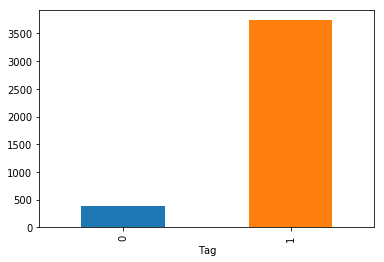

<Figure size 1440x720 with 0 Axes>

In [34]:
df_tagged_data.groupby('Tag')['Post'].count().plot.bar(ylim=0)
plt.figure(figsize=(20,10))
plt.show()

In [35]:
l = len(df_tagged_data.loc[df_tagged_data['Tag']==0])
print(l)

394


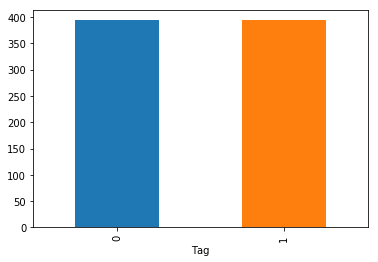

<Figure size 1440x720 with 0 Axes>

In [36]:
df_temp = df_tagged_data.groupby('Tag').head(l)
df_tagged_data = df_temp

df_tagged_data.groupby('Tag')['Post'].count().plot.bar(ylim=0)
plt.figure(figsize=(20,10))
plt.show()

In [37]:
X_data = df_tagged_data.drop(['Tag', 'Tag1'], axis = 1)
y_data = df_tagged_data['Tag']

In [38]:
N_PER_CLASS = 60
X_train, X_test, y_train, y_test = train_test_eq_split(X_data, y_data, n_per_class=N_PER_CLASS, random_state=42)

In [39]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

def print_scores(y_test, preds):
    print("F1:", f1_score(y_test, preds, average="macro"))
    print("Precision:", precision_score(y_test, preds, average="macro"))
    print("Recall:", recall_score(y_test, preds, average="macro"))   
    #print("AUC", roc_auc_score(y_test, preds))

In [40]:
from sklearn.ensemble import RandomForestClassifier

pipeline = Pipeline([
    ('features',feats),
    ('classifier', RandomForestClassifier(random_state = 42)),
])

pipeline.fit(X_train, y_train)
preds = pipeline.predict(X_test)
score = np.mean(preds == y_test)

print_scores(y_test, preds)

F1: 0.824010056568196
Precision: 0.8324808184143222
Recall: 0.825


In [41]:
from sklearn.linear_model import LogisticRegression

pipeline = Pipeline([
    ('features',feats),
    ('classifier', LogisticRegression(random_state = 42)),
])

pipeline.fit(X_train, y_train)
preds = pipeline.predict(X_test)
score = np.mean(preds == y_test)

print_scores(y_test, preds)

F1: 0.9248695652173913
Precision: 0.927972027972028
Recall: 0.925


In [42]:
# # save model to file
import pickle 

pickle.dump(pipeline, open("../Final Version Code/logistirregression.help.pickle.dat", "wb"))

FileNotFoundError: [Errno 2] No such file or directory: '../Final Version Code/logistirregression.help.pickle.dat'

In [ ]:
from sklearn import svm

pipeline = Pipeline([
    ('features',feats),
    ('classifier',svm.SVC(random_state = 42)),
])

pipeline.fit(X_train, y_train)
preds = pipeline.predict(X_test)
score = np.mean(preds == y_test)

print_scores(y_test, preds)

In [ ]:
from sklearn import svm

pipeline = Pipeline([
    ('features',feats),
    ('classifier',svm.LinearSVC(random_state = 42)),
])

pipeline.fit(X_train, y_train)
preds = pipeline.predict(X_test)
score = np.mean(preds == y_test)

print_scores(y_test, preds)

In [ ]:
import xgboost

pipeline = Pipeline([
    ('features',feats),
    ('classifier', xgboost.XGBClassifier(
                                         subsample=0.8,
                                         scale_pos_weight=1,
                                         nthread=15,   
                                         n_estimators=100,
                                         min_child_weight=1,
                                         max_depth=20,                                 
                                         learning_rate =0.2,
                                         gamma=.5,
                                         colsample_bytree=0.5,
                                         objective= 'binary:logistic',
                                         seed=27,
                                         eval_metric = 'error',
                                         ))])

pipeline.fit(X_train, y_train)

preds = pipeline.predict(X_test)
score = np.mean(preds == y_test)

print_scores(y_test, preds)

In [ ]:
from sklearn.metrics import confusion_matrix
target = 'Tag'
category_id_df = df_tagged_data[[target]].drop_duplicates().sort_values(target)

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

conf_mat = confusion_matrix(y_test, preds)

plt.figure(figsize=(9,9))
sns.heatmap(conf_mat, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r', \
           xticklabels=leTag.inverse_transform(category_id_df[target].values),
           yticklabels=leTag.inverse_transform(category_id_df[target].values))
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15)

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

print(f1_score(y_test, preds, average="macro"))
print(precision_score(y_test, preds, average="macro"))
print(recall_score(y_test, preds, average="macro"))    

In [ ]:
import warnings
from sklearn import cross_validation

warnings.filterwarnings("ignore", category=DeprecationWarning) 

scores = cross_validation.cross_val_score(pipeline, X_data, y_data, cv=5)

print(scores)
print(scores.mean())

In [ ]:
param_grid = {
        'classifier__learning_rate' : [0.1,0.2,0.05],
        'classifier__subsample' : [0.5,0.6,0.7,0.8,0.9],
        'classifier__colsample_bytree' : [0.5,0.6,0.7,0.8,0.9],
        'classifier__nthread' : [10,12,15,20],
        'classifier__scale_pos_weight' : [1,2,3,4,5],
        'classifier__max_depth': [6, 10, 15, 1,2,3,4,5],
        'classifier__gamma': [0, 0.25, 0.5, 1.0],
        'classifier__min_child_weight' : [1,2,3,4,5],
        'classifier__n_estimators': [100,200,150]}

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

from sklearn.model_selection import RandomizedSearchCV

gs = RandomizedSearchCV(pipeline, param_grid, n_jobs=1)  
gs.fit(X_train, y_train)  

In [ ]:
gs.best_params_

In [ ]:
gs.predict(X_test)
score = np.mean(preds == y_test)
print_scores(y_test, preds)

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import warnings
with warnings.catch_warnings():
    warnings.filterwarnings("ignore",category=FutureWarning)
    import h5py

X = X_data
y = y_data

scores_f1 = []
scores_pre = []
scores_rec = []
scores_auc = []

for i in range(5): 
    X_train, X_test, y_train, y_test = train_test_eq_split(X_data, y_data, n_per_class=5)
    gs.fit(X_train, y_train)

    preds = gs.predict(X_test)
    #score = np.mean(preds == y_test)
    f1 = f1_score(y_test, preds, average="macro")
    pr = precision_score(y_test, preds, average="macro")
    re = recall_score(y_test, preds, average="macro")
    auc = roc_auc_score(y_test, preds)
    
    scores_f1.append(f1)
    scores_pre.append(pr)
    scores_rec.append(re)
    scores_auc.append(auc)
    
    print("Pre" , pr)
    print("Re:" , re)
    print("f1" , f1)
    print("AUC" , auc)
    print("-----")
    
print("mean F1: ",  np.array(scores_f1).mean())
print("mean Precission: ",  np.array(scores_pre).mean())
print("mean Recall: ",  np.array(scores_rec).mean())
print("mean auc_roc: ", np.array(scores_auc).mean())

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import warnings
with warnings.catch_warnings():
    warnings.filterwarnings("ignore",category=FutureWarning)
    import h5py
    
from sklearn.svm import LinearSVC
from sklearn.datasets import make_classification

clf = LinearSVC()
X = X_data
y = y_data

scores_f1 = []
scores_pre = []
scores_rec = []
scores_auc = []

for i in range(5): 
    X_train, X_test, y_train, y_test = train_test_eq_split(X_data, y_data, n_per_class=5)
    
    pipeline = Pipeline([
        ('features',feats),
        ('classifier',svm.LinearSVC(random_state = 42)),
    ])

    pipeline.fit(X_train, y_train)
    preds = pipeline.predict(X_test)
    
    #score = np.mean(preds == y_test)
    f1 = f1_score(y_test, preds, average="macro")
    pr = precision_score(y_test, preds, average="macro")
    re = recall_score(y_test, preds, average="macro")
    auc = roc_auc_score(y_test, preds)
    
    scores_f1.append(f1)
    scores_pre.append(pr)
    scores_rec.append(re)
    scores_auc.append(auc)
    
    print("Pre" , pr)
    print("Re:" , re)
    print("f1" , f1)
    print("AUC" , auc)
    print("-----")
    
print("mean F1: ",  np.array(scores_f1).mean())
print("mean Precission: ",  np.array(scores_pre).mean())
print("mean Recall: ",  np.array(scores_rec).mean())
print("mean auc_roc: ", np.array(scores_auc).mean())

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import warnings
with warnings.catch_warnings():
    warnings.filterwarnings("ignore",category=FutureWarning)
    import h5py
    
from sklearn.svm import LinearSVC
from sklearn.datasets import make_classification

clf = LinearSVC()
X = X_data
y = y_data

scores_f1 = []
scores_pre = []
scores_rec = []
scores_auc = []

for i in range(5): 
    X_train, X_test, y_train, y_test = train_test_eq_split(X_data, y_data, n_per_class=5)
    
    pipeline = Pipeline([
    ('features',feats),
    ('classifier', LogisticRegression(random_state = 42)),
    ])

    pipeline.fit(X_train, y_train)
    preds = pipeline.predict(X_test)
    
    #score = np.mean(preds == y_test)
    f1 = f1_score(y_test, preds, average="macro")
    pr = precision_score(y_test, preds, average="macro")
    re = recall_score(y_test, preds, average="macro")
    auc = roc_auc_score(y_test, preds)
    
    scores_f1.append(f1)
    scores_pre.append(pr)
    scores_rec.append(re)
    scores_auc.append(auc)
    
    print("Pre" , pr)
    print("Re:" , re)
    print("f1" , f1)
    print("AUC" , auc)
    print("-----")
    
print("mean F1: ",  np.array(scores_f1).mean())
print("mean Precission: ",  np.array(scores_pre).mean())
print("mean Recall: ",  np.array(scores_rec).mean())
print("mean auc_roc: ", np.array(scores_auc).mean())

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import warnings
with warnings.catch_warnings():
    warnings.filterwarnings("ignore",category=FutureWarning)
    import h5py
    
from sklearn.svm import LinearSVC
from sklearn.datasets import make_classification

X = X_data
y = y_data

scores_f1 = []
scores_pre = []
scores_rec = []
scores_auc = []

for i in range(5): 
    X_train, X_test, y_train, y_test = train_test_eq_split(X_data, y_data, n_per_class=5)
    
    pipeline = Pipeline([
    ('features',feats),
    ('classifier', RandomForestClassifier(random_state = 42)),
    ])

    pipeline.fit(X_train, y_train)
    preds = pipeline.predict(X_test)
    
    #score = np.mean(preds == y_test)
    f1 = f1_score(y_test, preds, average="macro")
    pr = precision_score(y_test, preds, average="macro")
    re = recall_score(y_test, preds, average="macro")
    auc = roc_auc_score(y_test, preds)
    
    scores_f1.append(f1)
    scores_pre.append(pr)
    scores_rec.append(re)
    scores_auc.append(auc)
    
    print("Pre" , pr)
    print("Re:" , re)
    print("f1" , f1)
    print("AUC" , auc)
    print("-----")
    
print("mean F1: ",  np.array(scores_f1).mean())
print("mean Precission: ",  np.array(scores_pre).mean())
print("mean Recall: ",  np.array(scores_rec).mean())
print("mean auc_roc: ", np.array(scores_auc).mean())

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

fpr, tpr, thresholds = roc_curve(y_test, preds)
pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
pyplot.plot(fpr, tpr, marker='.')
# show the plot
pyplot.show()
print(roc_auc_score(y_test, preds))

In [ ]:
for i in range(len(y_test)):
    ac = list(y_test)[i]
    pr = preds[i]
    if ac!=pr:
        print(ac)
        print(X_test.Post.iloc[i])

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

scores = cross_validation.cross_val_score(pipeline, X_data, y_data, cv=5)

print(scores)
print(scores.mean())

In [ ]:
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=5, random_state=None)
# X is the feature set and y is the target
X = X_data
y = y_data

scores = []
for train_index, test_index in skf.split(X, y): 
    X_train, X_test = X.iloc[train_index], X.iloc[test_index] 
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    pipeline.fit(X_train, y_train)

    preds = pipeline.predict(X_test)
    score = np.mean(preds == y_test)
    scores.append(score)

print(np.array(scores).mean())

### Final Prediction

In [ ]:
final_df = df[df.Type==1]
print(len(final_df))

In [ ]:
import pickle

# load model from file
loaded_model = pickle.load(open("../FInal Version Code/logistirregression.help.pickle.dat", "rb"))
# make predictions for test data
y_pred = loaded_model.predict(final_df)
predictions = [round(value) for value in y_pred]
# evaluate predictions

In [ ]:
print(len(predictions))

In [ ]:
predictions[20595:20605]

In [ ]:
final_df['Tag'] = predictions

In [ ]:
final_df[['ID', 'Title', 'Original_post', 'Tag']].to_csv('./Data/Help_prediction_v0_jaws.csv', index=None)